# Timeseries

This notebook shows how to use the timeseries diagnostic. Here we focus on the `Timeseries` for the single model evaluation and the `PlotTimeseries` for the multi model plots.

In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
from aqua.diagnostics.timeseries import Timeseries

We set the `Timeseries` for a model and ERA5, with two different class instances.

In [2]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

In [3]:
ts_dataset = Timeseries(**dataset_dict, **common_dict)

2026-01-29 15:58:00 :: Timeseries :: INFO     -> No region provided, using lon_limits: None, lat_limits: None


In [4]:
run_dict = {'var': '2t',
            'units': 'degC'}

In [5]:
ts_dataset.run(**run_dict)

2026-01-29 15:58:00 :: Timeseries :: INFO     -> Running Timeseries for 2t


2026-01-29 15:58:01 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2026-01-29 15:58:01 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-01-29 15:58:01 :: FixerConfigure :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2026-01-29 15:58:01 :: FixerConfigure :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2026-01-29 15:58:01 :: Reader :: INFO     -> Grid metadata is lon-lat
2026-01-29 15:58:01 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2026-01-29 15:58:01 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2026-01-29 15:59:04 :: DataModel :: INFO     -> Applying data model: aqua
2026-01-29 15:59:04 :: CoordIdentifier :: WARNING  -> Coordinate 'level' assigned to multiple types with identical scores: [('depth', 50), ('height', 50)]. Disabling data model check for this coordinate.
2026-01-29 15:59:04 :: CoordTransforme

In [6]:
ts_obs = Timeseries(**obs_dict, **common_dict)
ts_obs.run(**run_dict, std=True)

2026-01-29 15:59:07 :: Timeseries :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2026-01-29 15:59:07 :: Timeseries :: INFO     -> Running Timeseries for 2t
2026-01-29 15:59:07 :: ConfigPath :: INFO     -> ERA5_era5_monthly triplet found in in obs!
2026-01-29 15:59:07 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-01-29 15:59:07 :: FixerConfigure :: INFO     -> Fix names in metadata is ERA5-destine-v1
2026-01-29 15:59:07 :: FixerConfigure :: INFO     -> Fix names ERA5-destine-v1 found in fixes files
2026-01-29 15:59:08 :: Reader :: INFO     -> Grid metadata is era5-r025s
2026-01-29 15:59:08 :: Regridder :: INFO     -> Grid name: era5-r025s
2026-01-29 15:59:08 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/aqua-dvc/areas/cell_area_era5-r025s.nc.
2026-01-29 15:59:08 :: DataModel :: INFO     -> Applying data model: aqua
2026-01-29 15:59:08 :: CoordTransformer :: INFO     ->

In [7]:
from aqua.diagnostics.timeseries import PlotTimeseries

In [ ]:
ts_obs.monthly

In [9]:
plot_dict = {'monthly_data': ts_dataset.monthly,
             'annual_data': ts_dataset.annual,
             'ref_monthly_data': ts_obs.monthly,
             'ref_annual_data': ts_obs.annual,
             'std_monthly_data': ts_obs.std_monthly,
             'std_annual_data': ts_obs.std_annual,
             'loglevel': 'INFO'}

2026-01-29 15:59:58 :: create_folder :: INFO     -> Creating folder ./png
2026-01-29 15:59:59 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.timeseries.climatedt-phase1.ICON.historical-1990.r1.obs.ERA5.era5.2t.png
2026-01-29 15:59:59 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.timeseries.climatedt-phase1.ICON.historical-1990.r1.obs.ERA5.era5.2t.png


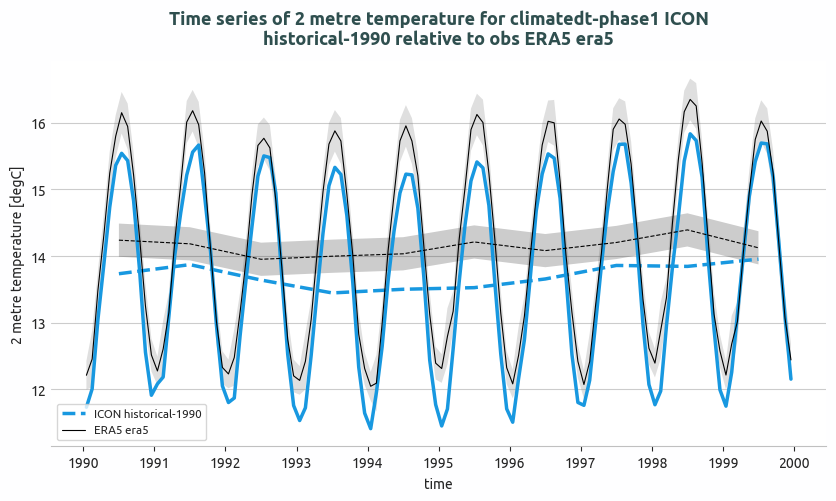

In [10]:
plot = PlotTimeseries(**plot_dict)
data_labels = plot.set_data_labels()
ref_labels = plot.set_ref_label()
desc = plot.set_description()
title = plot.set_title()
fig, _ = plot.plot_timeseries(data_labels=data_labels, ref_label=ref_labels, title=title)
plot.save_plot(fig=fig, description=desc)